## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single data
merged_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

#Display dataset
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_total=len(merged_df)
mouse_total


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicatemice_df = merged_df[merged_df.duplicated(["Mouse ID","Timepoint"])]

In [4]:
merged_df.duplicated(['Mouse ID'])

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
droppedmice=duplicatemice_df[duplicatemice_df['Mouse ID']=='g989'].index
droppedmice

Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [7]:
mouse_totaldup=len(duplicatemice_df["Mouse ID"].value_counts())
mouse_totaldup

1

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_merge=merged_df.drop(['duplicatemice_df'],axis=0,inplace=True)
clean_merge=merged_df.drop_duplicates(keep='first')

clean_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_total=len(clean_merge)
clean_mouse_total

1892

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = clean_merge.groupby(["Drug Regimen"])
regimen_mean=grouped_regimen['Tumor Volume (mm3)'].mean()
regimen_median=grouped_regimen['Tumor Volume (mm3)'].median()
regimen_variance=grouped_regimen['Tumor Volume (mm3)'].var()
regimen_std=grouped_regimen['Tumor Volume (mm3)'].std()
regimen_sem=grouped_regimen['Tumor Volume (mm3)'].sem()
# This method is the most straightforward, creating multiple series and putting them all together at the end.

regimen_summary=pd.DataFrame({"Mean": regimen_mean,\
                                "Median":regimen_median,
                             "Variance":regimen_variance,
                             "STD":regimen_std,
                             "SEM":regimen_sem})
regimen_summary

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#research measurements pandas is defining and how to visualize without the use of aataframe
# This method produces everything in a single groupby function.
clean_merge.describe()



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,12.810254,25.662262,19.582452,50.451260,1.022199
std,7.189027,3.922652,14.075984,8.896191,1.138032
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.954697,1.000000
75%,20.000000,29.000000,30.000000,56.298917,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar Plots

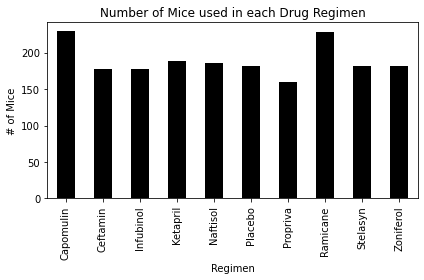

In [82]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
x_axis=clean_merge.groupby(["Drug Regimen"])
count_mice = x_axis['Mouse ID'].count()
# xaxis should be the drugs, yaxis the count of mice
mice_regimen_bar=count_mice.plot(kind='bar',title="Number of Mice used in each Drug Regimen", color="black")
mice_regimen_bar.set_xlabel("Regimen")
mice_regimen_bar.set_ylabel("# of Mice")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Number of Mice used in each Drug Regimen')

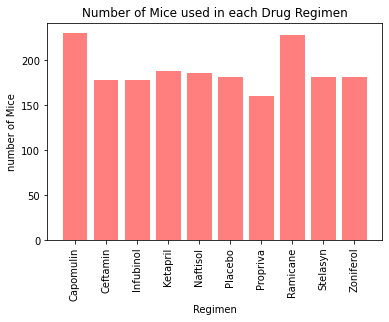

In [77]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis2 = np.arange(len(x_axis))
tick_locations = [value for value in x_axis2]
plt.bar(x_axis2, count_mice, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, list(count_mice.index), rotation="vertical")
# x_axis["Drug Regimen"]
plt.xlabel("Regimen")
plt.ylabel("number of Mice")
plt.title("Number of Mice used in each Drug Regimen")



## Pie Plots

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=clean_merge.groupby("Sex")
count_gender=gender['Sex'].count()
count_gender

Sex
Female    934
Male      958
Name: Sex, dtype: int64

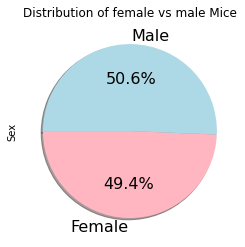

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_gender.plot(kind='pie', y='Sex', \
                        title="Distribution of female vs male Mice",startangle=180,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightpink","lightblue"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart


plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels=list(count_gender.index.values)
# The values of each section of the pie chart
sizes = count_gender

# The colors of each section of the pie chart
colors = ["lightpink", "lightblue"]


Text(0, 0.5, 'Sex')

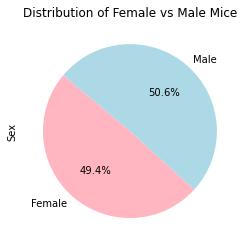

In [17]:

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [54]:
#create a table filtered with the four drugs
four_regimens = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol']
fourdrug_df=clean_merge[clean_merge["Drug Regimen"].isin(four_regimens)]
fourdrug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Calculate the final tumor volume of each mouse
# final_tumor_group=fourdrug_df.drop_duplicates(subset="Mouse ID",keep='last')

final_tumor_group= fourdrug_df.groupby(['Drug Regimen','Mouse ID']).agg(\
    final_tumor_vol=('Tumor Volume (mm3)',lambda x: x.iloc[-1]))
final_tumor_group.head()

final_tumor_vol
Drug Regimen Mouse ID                 
Capomulin    b128            38.982878
             b742            38.939633
             f966            30.485985
             g288            37.074024
             g316            40.159220

In [61]:
# final_tumor_group.groupby(['Drug Regimen','Mouse ID'])
# final_tumor_group1 = final_tumor_group[['Drug Regimen','Mouse ID','Tumor Volume (mm3)']]
# index_drug_reg=final_tumor_group1.set_index('Drug Regimen')
# index_drug_reg.head()


In [62]:
#restructure data frame
four_drug_columns = final_tumor_group.stack(level=0).unstack(level=0)

four_drug_columns.head()

,Drug Regimen,Capomulin,Ketapril,Naftisol,Ramicane
Mouse ID,,,,,
a411,final_tumor_vol,NaN,NaN,NaN,38.407618
a444,final_tumor_vol,NaN,NaN,NaN,43.047543
a457,final_tumor_vol,NaN,49.783419,NaN,NaN
a520,final_tumor_vol,NaN,NaN,NaN,38.810366
a644,final_tumor_vol,NaN,NaN,NaN,32.978522


In [69]:
#create a dataframe

counter = 0
# tumors = four_drug_columns["Tumor Volume (mm3)"]

# Do quartile calculations for each drug
for drug in four_regimens:
    quartiles = four_drug_columns[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is {lowerq}")
    print(f"The upper quartile of {drug} is {upperq}")
    print(f"The interquartile range of {drug} is {iqr}")
    print(f"The the median of {drug} is {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is 32.37735684
The upper quartile of Capomulin is 40.1592203
The interquartile range of Capomulin is 7.78
The the median of Capomulin is 38.125164399999996 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is 31.56046955
The upper quartile of Ramicane is 40.65900627
The interquartile range of Ramicane is 9.1
The the median of Ramicane is 36.56165229 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
------------------------------------
Ketapril IQR data is:
The lower quartile of Ketapril is 56.72009545
The upper quartile of Ketapril is 69.87225079
The interquartile range of Ketapril is 13.15
The the median of Ketapril is 64.48781246 
Values below 37.0 for Ketapril could be outliers.

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [74]:
box_x_axis = []

# Iterate through the list to select the same column names
# and appending to the boxplot_list
for drug in four_regimens:
    box_x_axis.append(list(four_drug_columns[drug].dropna()))

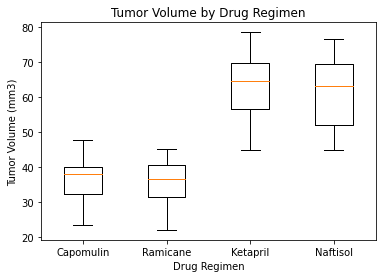

In [75]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(box_x_axis, labels=four_regimens,notch=0)
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [23]:
capomulin_df = clean_merge.loc[clean_merge['Drug Regimen'] == 'Capomulin']
capomulin_s185=capomulin_df.loc[capomulin_df["Mouse ID"]=='s185']

# View the dataframe
capomulin_s185.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [24]:
capomulin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 10 to 1455
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            230 non-null    object 
 1   Drug Regimen        230 non-null    object 
 2   Sex                 230 non-null    object 
 3   Age_months          230 non-null    int64  
 4   Weight (g)          230 non-null    int64  
 5   Timepoint           230 non-null    int64  
 6   Tumor Volume (mm3)  230 non-null    float64
 7   Metastatic Sites    230 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 16.2+ KB


In [25]:
#timepoint vs tumor

# cap_tumor_vol=cap_time_df['Tumor Volume (mm3)']
cap_time_df=capomulin_s185[['Timepoint','Tumor Volume (mm3)']]
cap_tumor_vol=cap_time_df['Tumor Volume (mm3)']
cap_time_df.head()

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876


Text(0, 0.5, 'Tumor Volume (mm3) of Mouse S185')

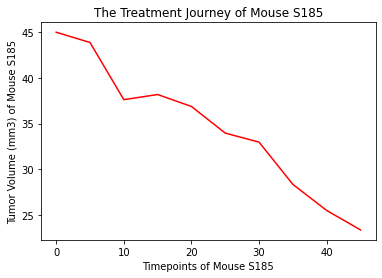

In [76]:
# Generate a line plot
# x_line=list(cap_time_df.index.values)
x_line=cap_time_df["Timepoint"]
timevstumor=plt.plot(x_line, cap_tumor_vol, color="red")
plt.title("The Treatment Journey of Mouse S185")
plt.xlabel("Timepoints of Mouse S185")
plt.ylabel("Tumor Volume (mm3) of Mouse S185")


In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



In [28]:
cap_mice = capomulin_df.groupby(['Mouse ID'])
avg_weight_vol=cap_mice['Weight (g)'].mean()
avg_tumor_vol=cap_mice['Tumor Volume (mm3)'].mean()
# cap_mice_df=cap_mice[[avg_weight_vol],[avg_tumor_vol]]


cap_mice_df=pd.DataFrame({"Average Mouse Weight": avg_weight_vol,\
                                "Average Tumor Vol(mm3)":avg_tumor_vol})


cap_mice_df.head()

,Average Mouse Weight,Average Tumor Vol(mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


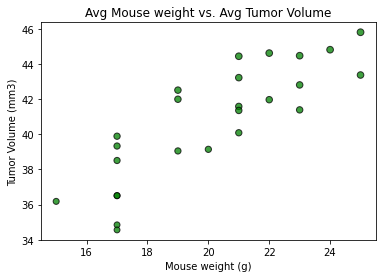

In [29]:
#create scatter plot
plt.scatter(
    cap_mice_df['Average Mouse Weight'],
    cap_mice_df['Average Tumor Vol(mm3)'],
    marker='o',
    facecolors='green',
    edgecolors='black',
    s=cap_mice_df['Average Tumor Vol(mm3)'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Avg Mouse weight vs. Avg Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [31]:
correlation = st.pearsonr(cap_mice_df['Average Mouse Weight'],cap_mice_df['Average Tumor Vol(mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419363424694719
The equation of the regression line is: y = 0.95x + 21.55


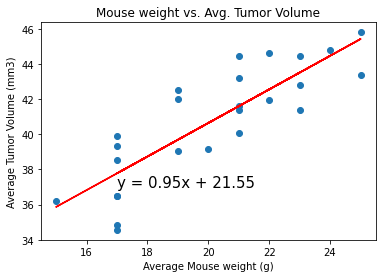

In [32]:
# Print out the r-squared value along with the plot.
x_values = cap_mice_df['Average Mouse Weight']
y_values = cap_mice_df['Average Tumor Vol(mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Average Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()